In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [8]:
os.getcwd()

'/Users/marcello/Desktop/LONDON'

In [10]:
# Load the dataset with a semicolon as the delimiter
data = pd.read_csv('data.csv', delimiter=';')

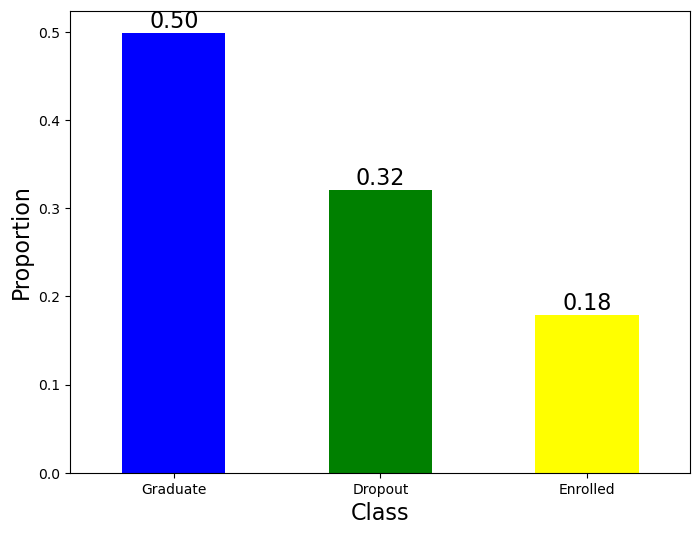

In [36]:
# Analyze the distribution of the target variable
target_distribution = data['Target'].value_counts(normalize=True)
font_size = 16

# Visualize the class distribution with bar values
plt.figure(figsize=(8, 6))
bars = target_distribution.plot(kind='bar', color=['blue', 'green', 'yellow'])

# Add values on top of the bars
for bar in bars.containers[0]:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        bar.get_height(),                   # Y position (height of the bar)
        f'{bar.get_height():.2f}',          # Format value
        ha='center', va='bottom', fontsize=font_size
    )

# Customize the plot
#plt.title('Distribution of Target Variable', fontsize=14)
plt.xlabel('Class', fontsize=font_size)
plt.ylabel('Proportion', fontsize=font_size)
plt.xticks(rotation=0)

# Save the plot to an image file (e.g., PNG format)
plt.savefig('targetvariable.png')
plt.show()

In [14]:
# Filter the dataset to include only "Graduate" and "Dropout" categories
data_binary = data[data['Target'].isin(['Graduate', 'Dropout'])]

# Encode the target variable for binary classification (0: Dropout, 1: Graduate)
data_binary['Target'] = LabelEncoder().fit_transform(data_binary['Target'])

# Check the class distribution
class_distribution = data_binary['Target'].value_counts(normalize=True)

class_distribution

/var/folders/k3/q7j127zd0m5__k41x3bdm10h0000gp/T/ipykernel_677/1890815853.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_binary['Target'] = LabelEncoder().fit_transform(data_binary['Target'])


Target
1    0.60854
0    0.39146
Name: proportion, dtype: float64

In [16]:
continuous_features = [
 'Application order',
 'Previous qualification (grade)',
 'Admission grade',
 'Age at enrollment',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

binary_features = [
'Daytime/evening attendance\t',
 'Displaced',
 'Educational special needs',
 'International',
 'Debtor',
 'Tuition fees up to date',
 'Scholarship holder',
 'Gender']

ordinal_features = ['Marital status',
 'Application mode',
 'Previous qualification',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation"]

categorical_columns = [
'Daytime/evening attendance\t',
 'Displaced',
 'Educational special needs',
 'International',
 'Debtor',
 'Tuition fees up to date',
 'Scholarship holder',
 'Gender',
'Marital status',
 'Application mode',
 'Previous qualification',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation"]

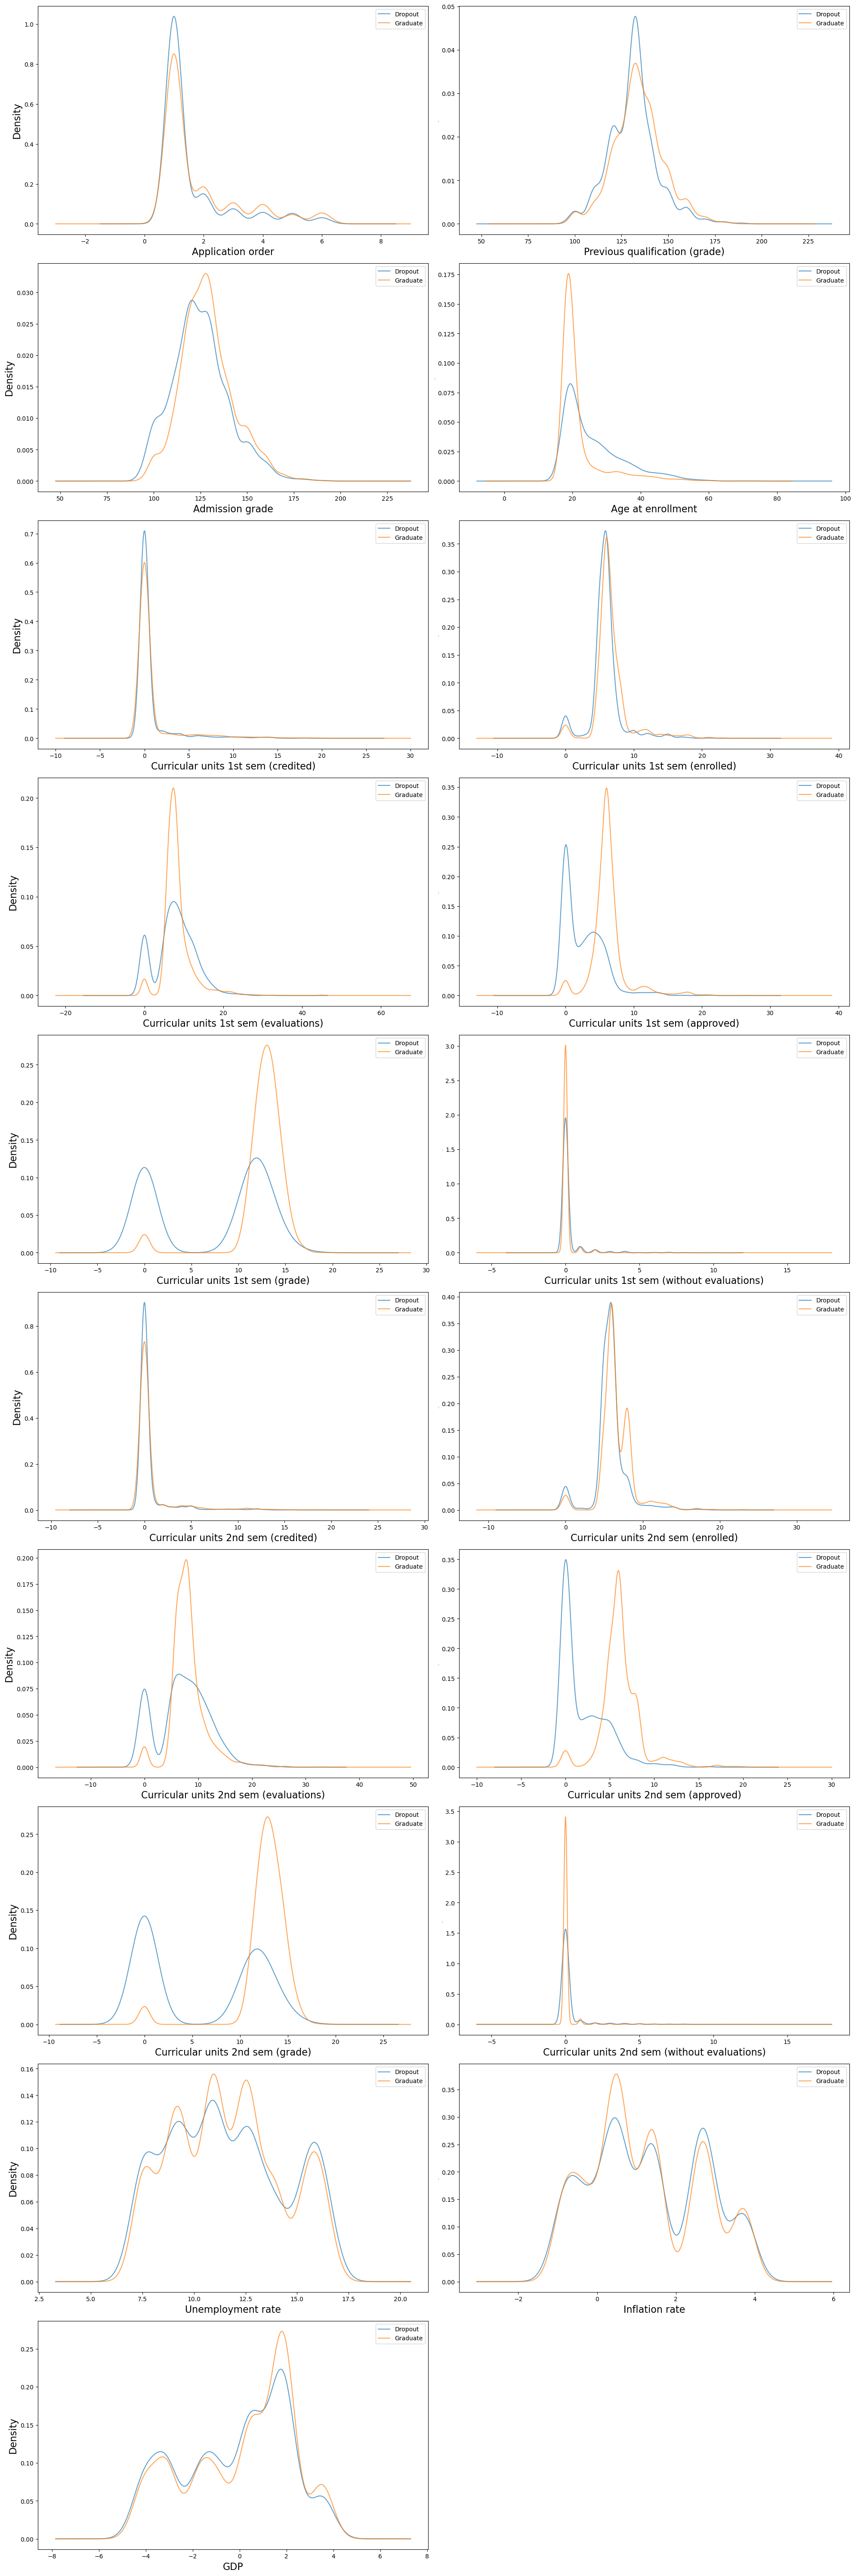

In [24]:
# Detect all numerical features 

# Create subplots with multiple rows and columns to fit all continuous features
n_cols = 2  # Number of columns per row
n_rows = -(-len(continuous_features) // n_cols)  # Calculate the required number of rows
font_size = 16

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows), sharey=False)

# Flatten axes for easy iteration, even if there's only one row
axes = axes.flatten()

# Plot each continuous feature
for i, feature in enumerate(continuous_features):
    ax = axes[i]
    for label in data_binary['Target'].unique():
        subset = data_binary[data_binary['Target'] == label]
        subset[feature].plot(kind='kde', ax=ax, label='Graduate' if label == 1 else 'Dropout', alpha=0.7)
    #ax.set_title(f'Distribution of {feature}', fontsize=12)
    ax.set_xlabel(feature, fontsize=font_size)
    ax.set_ylabel('Density', fontsize=font_size if i % n_cols == 0 else 0)  # Show Y-axis label only on the first column
    ax.legend()

# Remove any unused subplots
for j in range(len(continuous_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
# Save the plot to an image file (e.g., PNG format)
plt.savefig('allnumerical.png')

# Show the plots
plt.show()

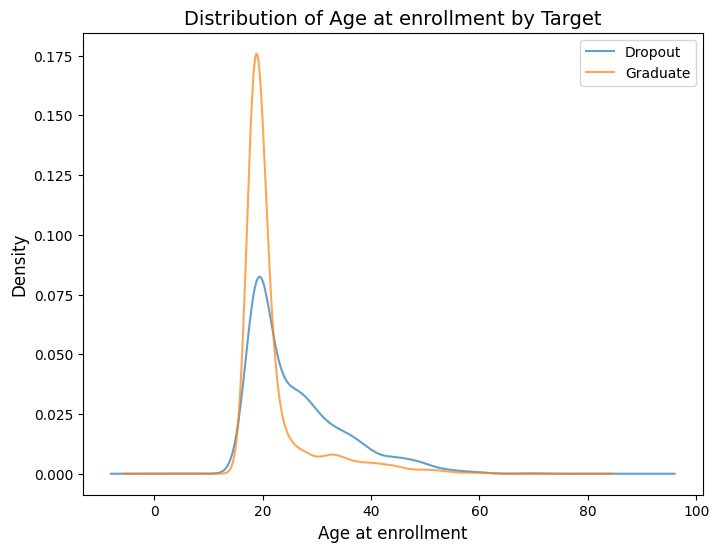

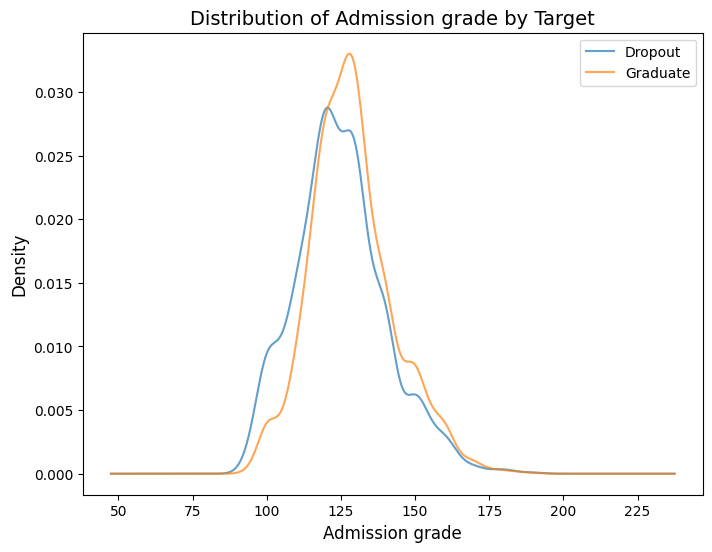

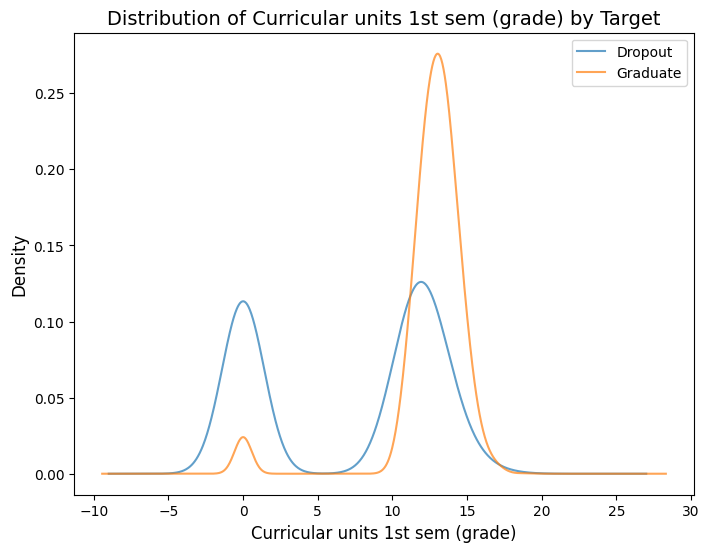

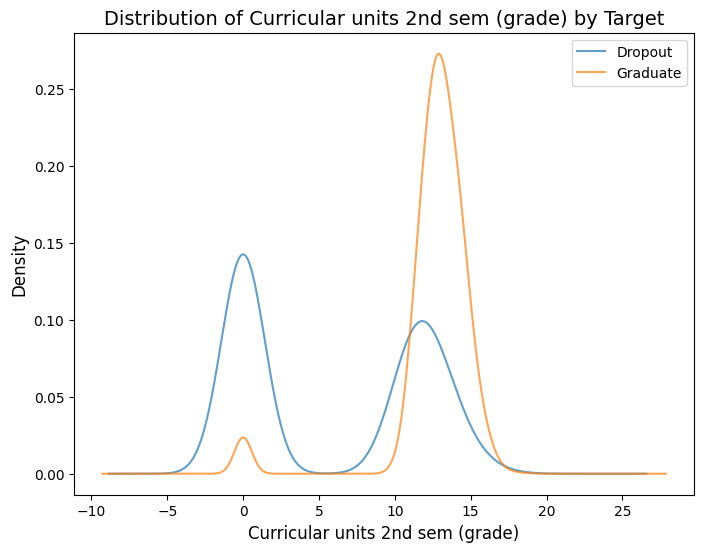

In [29]:
# Analyze key numerical features
numerical_features = [
    'Age at enrollment', 'Admission grade', 
    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)'
]

# Plot distributions of numerical features, split by Target
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    for label in data_binary['Target'].unique():
        subset = data_binary[data_binary['Target'] == label]
        subset[feature].plot(kind='kde', label='Graduate' if label == 1 else 'Dropout', alpha=0.7)
    plt.title(f'Distribution of {feature} by Target', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.show()

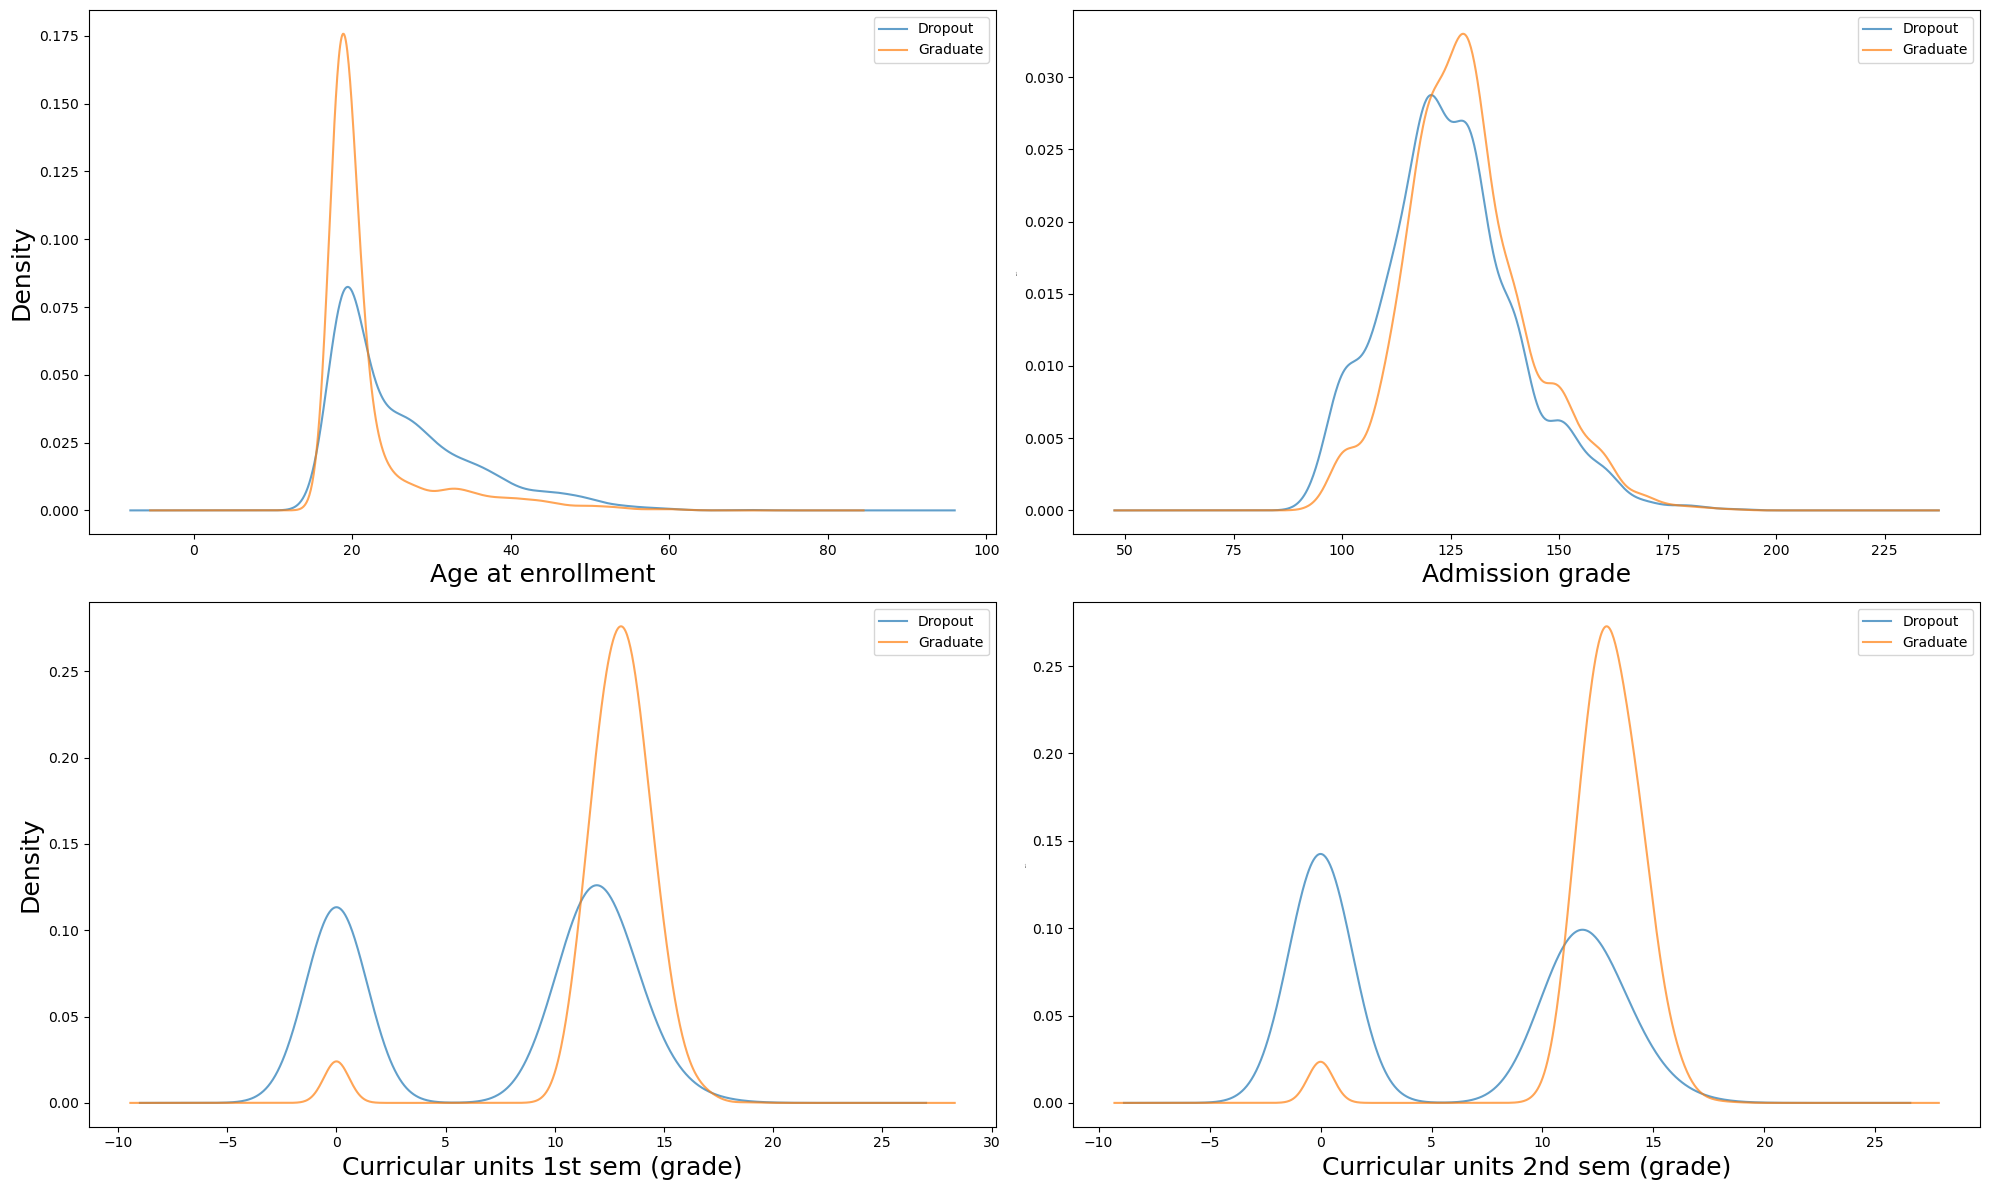

In [32]:
# Detect all numerical features and exclude binary variables
continuous_features = [
    'Age at enrollment', 'Admission grade', 
    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)'
]

# Create subplots with multiple rows and columns to fit all continuous features
n_cols = 2  # Number of columns per row
n_rows = -(-len(continuous_features) // n_cols)  # Calculate the required number of rows
font_size = 18

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows), sharey=False)

# Flatten axes for easy iteration, even if there's only one row
axes = axes.flatten()

# Plot each continuous feature
for i, feature in enumerate(continuous_features):
    ax = axes[i]
    for label in data_binary['Target'].unique():
        subset = data_binary[data_binary['Target'] == label]
        subset[feature].plot(kind='kde', ax=ax, label='Graduate' if label == 1 else 'Dropout', alpha=0.7)
    #ax.set_title(f'Distribution of {feature}', fontsize=font_size)
    ax.set_xlabel(feature, fontsize=font_size)
    ax.set_ylabel('Density', fontsize=font_size if i % n_cols == 0 else 0)  # Show Y-axis label only on the first column
    ax.legend()

# Remove any unused subplots
for j in range(len(continuous_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
# Save the plot to an image file (e.g., PNG format)
plt.savefig('critical.png')

# Show the plots
plt.show()

/var/folders/5n/qzjdchds663dcy15xcqnsz7c0000gn/T/ipykernel_29239/3027501781.py:28: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/var/folders/5n/qzjdchds663dcy15xcqnsz7c0000gn/T/ipykernel_29239/3027501781.py:30: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig('binary.png')
/Users/marcelloferreira/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


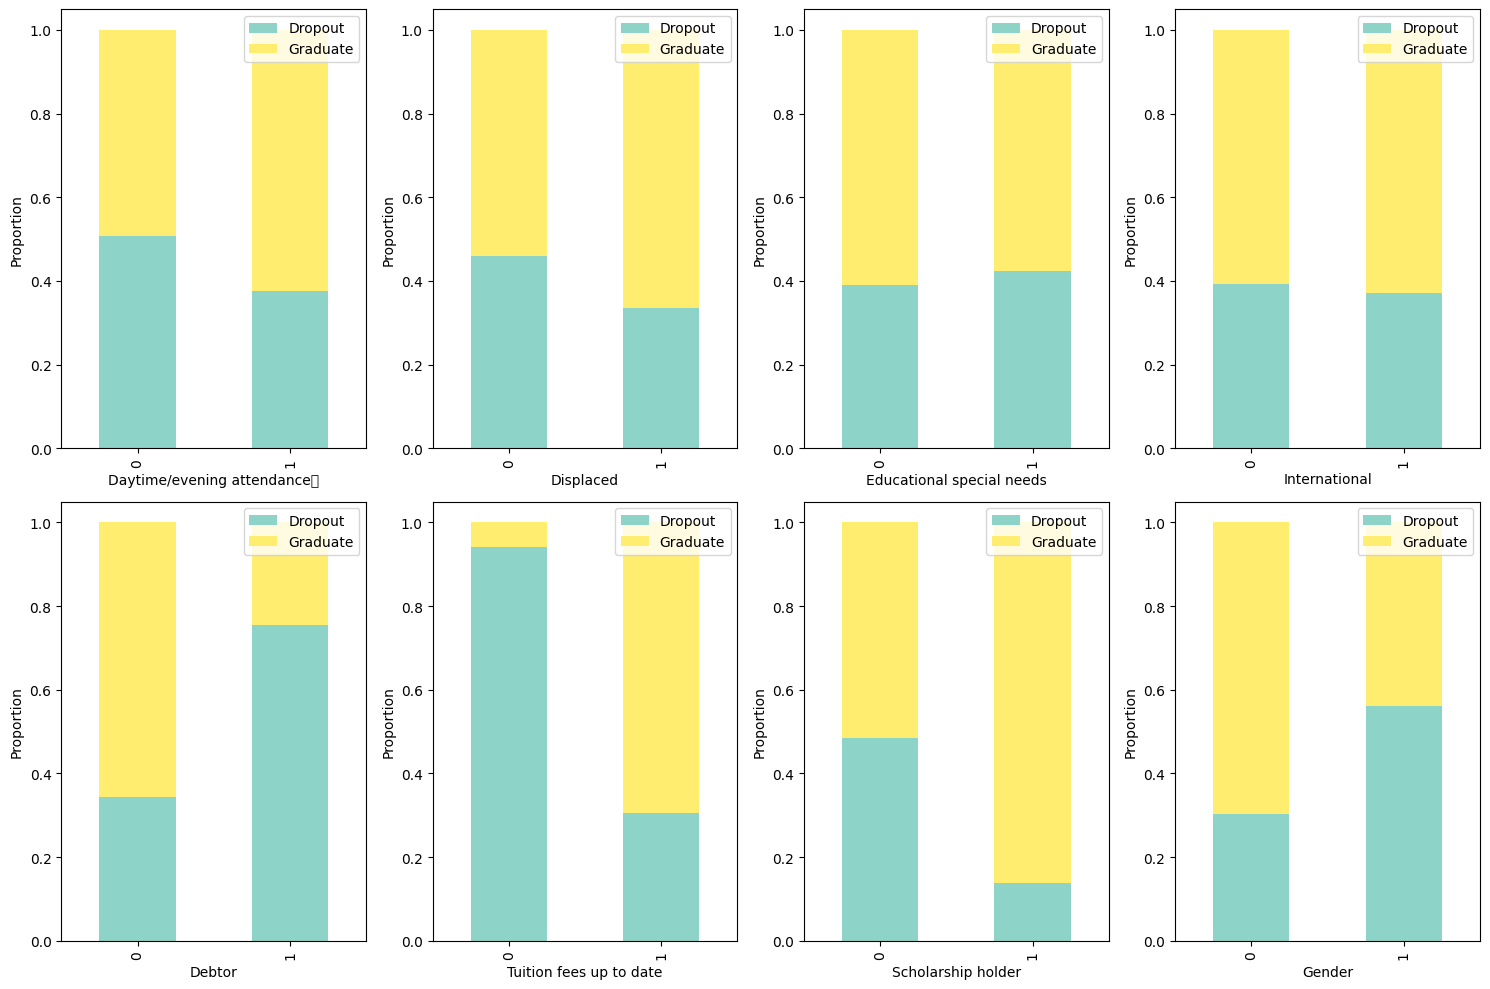

In [31]:
# Identify all binary features in the dataset (excluding the target variable)

# Create subplots for all categorical features
n_cols = 4  # Number of columns per row
n_rows = -(-len(binary_features) // n_cols)  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), sharey=False)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each categorical feature
for i, feature in enumerate(binary_features):
    ax = axes[i]
    pd.crosstab(data_binary[feature], data_binary['Target'], normalize='index').plot(
        kind='bar', stacked=True, ax=ax, colormap='Set3', legend=True
    )
    #ax.set_title(f'{feature} vs Target', fontsize=12)
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Proportion', fontsize=10)
    ax.legend(title='', labels=['Dropout', 'Graduate'])

# Remove any unused axes
for j in range(len(binary_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
# Save the plot to an image file (e.g., PNG format)
plt.savefig('binary.png')

# Show the plots
plt.show()

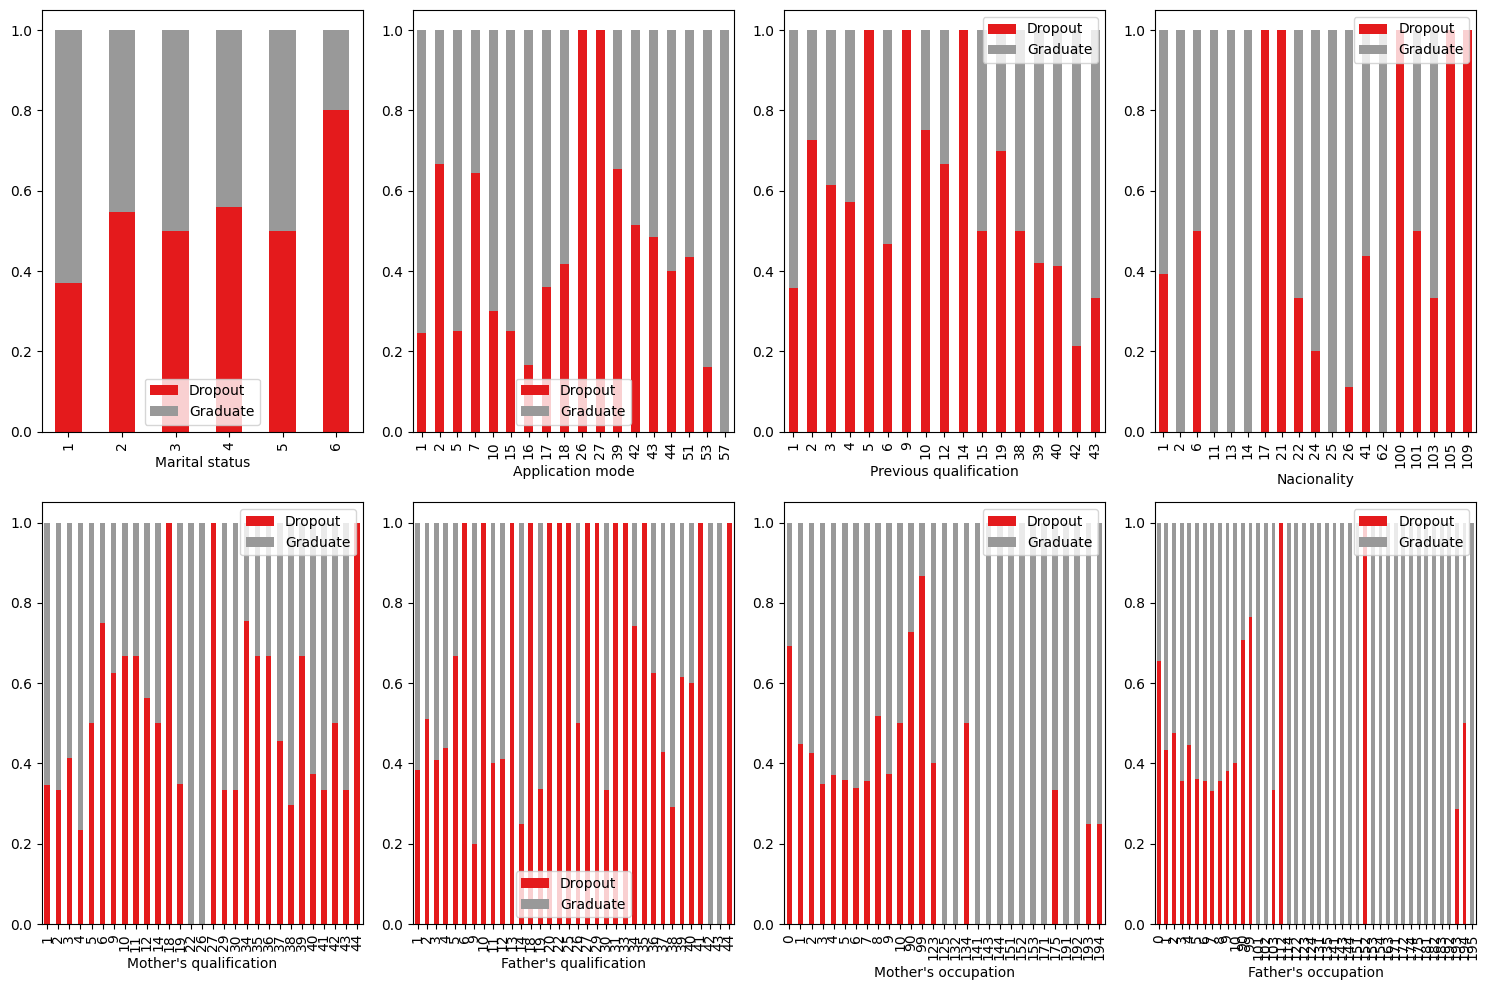

In [32]:
# Create subplots for all categorical features
n_cols = 4  # Number of columns per row
n_rows = -(-len(ordinal_features) // n_cols)  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), sharey=False)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each categorical feature
for i, feature in enumerate(ordinal_features):
    ax = axes[i]
    pd.crosstab(data_binary[feature], data_binary['Target'], normalize='index').plot(
        kind='bar', stacked=True, ax=ax, colormap='Set1', legend=True
    )
    #ax.set_title(f'{feature} vs Target', fontsize=12)
    ax.set_xlabel(feature, fontsize=10)
    #ax.set_ylabel('Proportion', fontsize=10)
    ax.legend(title='', labels=['Dropout', 'Graduate'])

# Remove any unused axes
for j in range(len(ordinal_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
# Save the plot to an image file (e.g., PNG format)
plt.savefig('ordinal.png')

# Show the plots
plt.show()

In [33]:
# Correlation Matrix

In [39]:
# Generate a correlation matrix for all variables (numerical and encoded categorical variables)
# Encode categorical variables where needed to include them in the matrix
encoded_data = data.copy()

for col in categorical_columns:
    encoded_data[col] = LabelEncoder().fit_transform(encoded_data[col])

# Generate the correlation matrix
correlation_matrix_all = encoded_data.corr()

/var/folders/5n/qzjdchds663dcy15xcqnsz7c0000gn/T/ipykernel_29239/3378139458.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_all = encoded_data.corr()


/var/folders/5n/qzjdchds663dcy15xcqnsz7c0000gn/T/ipykernel_29239/4117050349.py:15: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig('corrmatrix.png')
/Users/marcelloferreira/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


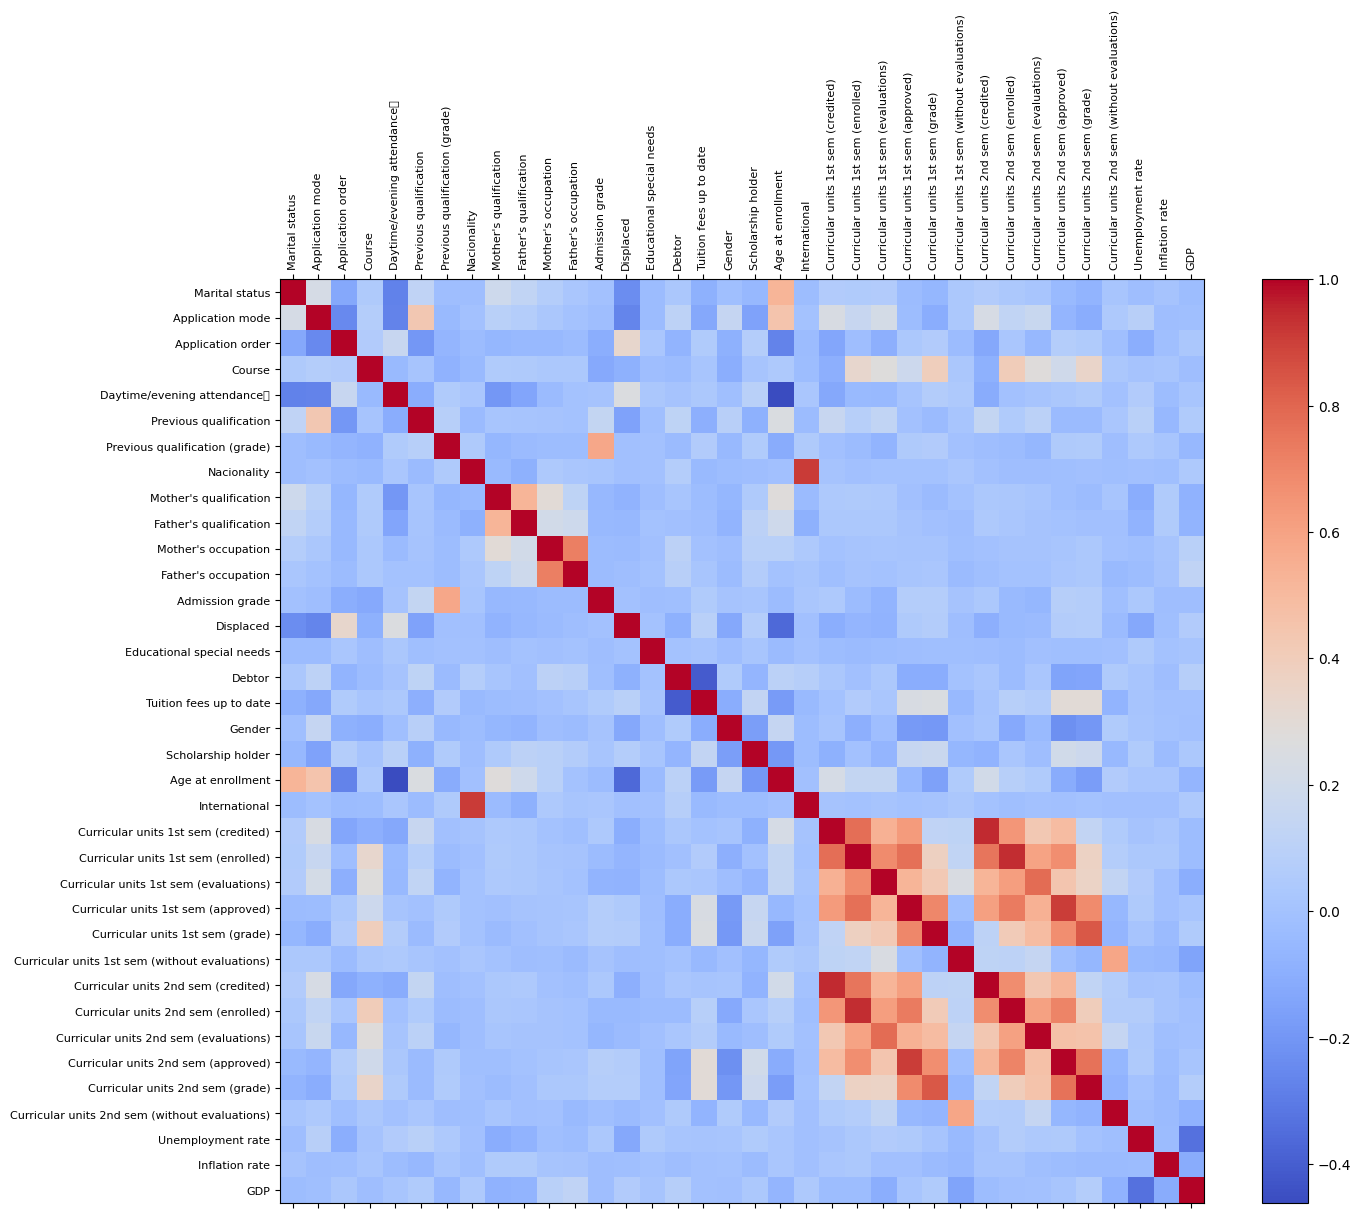

In [40]:
# Create a heatmap using matplotlib
fig, ax = plt.subplots(figsize=(15, 12))
cax = ax.matshow(correlation_matrix_all, cmap="coolwarm")
plt.colorbar(cax)

# Set axis labels and ticks
ax.set_xticks(range(len(correlation_matrix_all.columns)))
ax.set_yticks(range(len(correlation_matrix_all.columns)))
ax.set_xticklabels(correlation_matrix_all.columns, rotation=90, fontsize=8)
ax.set_yticklabels(correlation_matrix_all.columns, fontsize=8)

#plt.title("Correlation Matrix", fontsize=16, pad=20)

# Save the plot to an image file (e.g., PNG format)
plt.savefig('corrmatrix.png')

plt.show()
